In [1]:
# Class IT-533 Week #8  - Measures of Association
# Summer 2020
# Lab #7 - ramen-ratings.csv
# By Wei Geng(David) and Anusha Bale
# Created on: 07/05/2020
# Honor Code: “I have neither given or received, nor have I tolerated others' use of unauthorized aid.”

In [2]:
# install pandas in case you dont have pandas, matplotlib and sklearn pre-installed
%pip install pandas
%pip install matplotlib
%pip sklearn

In [3]:
# Convert to pandas DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
remen_df = pd.read_csv('https://raw.githubusercontent.com/intelspeedstep/AMOD533/master/ramen-ratings.csv')
remen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
# output the data attributes and its datatypes, plus the shape of the dataset
print(remen_df.info(verbose=True))
print(remen_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB
None
(2580, 7)


In [5]:
# Convert Stars from object to numberic and Review # to str since ID number usually has no analytical value
remen_df.loc[remen_df["Stars"]=='Unrated','Stars']=np.nan
remen_df['Stars']=remen_df['Stars'].astype(float)
# remen_df['Review #']=remen_df['Review #'].astype(str)

### <font color = 'orange'> Model: Build a MLP Neural Network Model </font>
</font></br>

In [6]:
# Convert the string variables to numeric categorical varibles, so the model can run. Sklearn classifers requires categorical variables to be numerically coded.
from sklearn.preprocessing import LabelEncoder
remen_df["Brand"] = LabelEncoder().fit_transform(remen_df["Brand"])
remen_df["Variety"] = LabelEncoder().fit_transform(remen_df["Variety"])
remen_df["Style"] = LabelEncoder().fit_transform(remen_df["Style"].astype(str))
remen_df["Country"] = LabelEncoder().fit_transform(remen_df["Country"])
remen_df["Top Ten"] = LabelEncoder().fit_transform(remen_df["Top Ten"].astype(str))
remen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,190,2189,4,18,3.75,38
1,2579,119,1443,5,32,1.00,38
2,2578,192,454,4,35,2.25,38
3,2577,336,709,5,32,2.75,38
4,2576,38,1954,5,16,3.75,38


In [7]:
# using a 67% training/ 34% test split, run a Neural Network analysis on your data set
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
remen_df.loc[remen_df['Stars']>3,'Stars_Ind']=1
remen_df['Stars_Ind'].fillna(0,inplace=True)
X=remen_df.drop(['Stars','Stars_Ind','Review #'], axis=1)
y=remen_df['Stars_Ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1859, test_size=0.33)

In [8]:
# Apply mean normalization; this step is to standarize the features to follow the normal distribution
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
from sklearn.preprocessing import StandardScaler
X_train_array = StandardScaler().fit_transform(X_train.values) 
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

In [9]:
# Center test data.
X_test_array = StandardScaler().fit_transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

In [10]:
# fit the neural_network model MLP, set the hidden_layer to 10, solver='sgd',learning_rate_init=0.01,max_iter=500
# we got a perfect model that has 100% accuracy in both training and test dataset.
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50),solver='sgd',learning_rate_init=0.001,max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Training set score: {:.5f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.5f}".format(mlp.score(X_test, y_test)))

Test set predictions:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

### <font color = 'orange'> Tune the model to pick the best **hyperparamenters**</font>
</font></br>

In [11]:
# GridSearchCV is a very good function where we can use to optimize the hypytermeters with crossvalidation
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,10,10), (20,20,20), (20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, param_grid, n_jobs=None, cv=None)
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [12]:
# refit the model with the best parameters above, the performance improved.
mlp = MLPClassifier(activation= 'relu', alpha= 0.05, hidden_layer_sizes= (10, 10, 10), learning_rate= 'adaptive', solver= 'adam',learning_rate_init=0.01,max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Training set score: {:.5f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.5f}".format(mlp.score(X_test, y_test)))

Test set predictions:
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

### <font color = 'orange'>Use gradient descent to improve the model performance on multiple logistic regression</font>

In [13]:
# Define Logistic Regression hypothesis or sigmoid function

def sigmoid(X, theta):
    
    z = np.dot(X, theta[1:]) + theta[0]
    
    return 1.0 / ( 1.0 + np.exp(-z))

# Define Logistic Regression Cost Function
def lrCostFunction(y, hx):
  
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    
    return j

# Gradient Descent function to minimize the Logistic Regression Cost Function.
def lrGradient(X, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    cost = []
    
    for i in range(num_iter):
        # call sigmoid function 
        hx = sigmoid(X, theta)
        # calculate error
        error = hx - y
        # calculate gradient
        grad = X.T.dot(error)
        # update values in theta
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
        
        cost.append(lrCostFunction(y, hx))
        
    return cost        
# m = Number of training examples
# n = number of features
m, n = X.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.01
num_iter = 500

cost = lrGradient(X_train, y_train, theta, alpha, num_iter)

Text(0.5, 1.0, 'Logistic Regression')

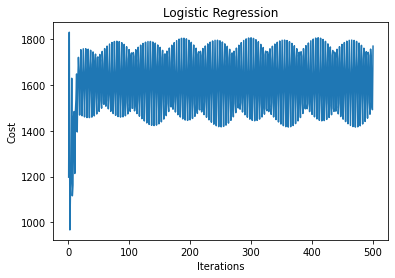

In [16]:
# Make a plot with number of iterations on the x-axis and the cost function on y-axis
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')

In [14]:
# print theta paramters 
print ('\n Logisitc Regression bias(intercept) term :', theta[0])
print ('\n Logisitc Regression estimated coefficients :', theta[1:])


 Logisitc Regression bias(intercept) term : 2.907609324306749

 Logisitc Regression estimated coefficients : [-1.8411478   0.26248268  0.13099339 -1.72058439 -1.9092075 ]


In [15]:
# fit the logistic model with data that is optimizee with the gradient descent 
from sklearn import linear_model
logit_model = linear_model.LogisticRegression()
logit_model.fit(X_train, y_train)
print("linear_model.coef_:", logit_model.coef_)
print("linear_modelintercept_:", logit_model.intercept_)
print("Model accuracy on the training dataset is : {:.5f}".format(logit_model.score(X_train,y_train)))
print("Model accuracy on the testing dataset is : {:.5f}".format(logit_model.score(X_test, y_test)))

linear_model.coef_: [[ 0.02021641 -0.10449977 -0.04593883 -0.06356577 -0.79246867]]
linear_modelintercept_: [1.31633821]
Model accuracy on the training dataset is : 0.77720
Model accuracy on the testing dataset is : 0.76408


**Note: Please check the attached Word Document for the answers for this week's lab assignment questions. Thanks**

### <font color = 'orange'>------------------------------------------------------------------------END--------------------------------------------------------------------------------- </font>